# Proyek Machine Learning Terapan

COHORT ID : MC008D5X2466  
Nama : Gabriella Yoanda Pelawi  
Email : mc008d5x2466@student.devacademy.id

## 1. Data Loading

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

Dataset yang digunakan adalah data [Employee Attrition](https://www.kaggle.com/datasets/stealthtechnologies/employee-attrition-dataset/data) berbentuk csv yang diambil dari Kaggle. 

In [116]:
data = pd.read_csv("employee_attrition.csv")
data

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,52685,36,Male,13,Healthcare,8029,Excellent,High,Average,1,...,1,Mid,Large,22,No,No,No,Poor,Medium,Stayed
1,30585,35,Male,7,Education,4563,Good,High,Average,1,...,4,Entry,Medium,27,No,No,No,Good,High,Left
2,54656,50,Male,7,Education,5583,Fair,High,Average,3,...,2,Senior,Medium,76,No,No,Yes,Good,Low,Stayed
3,33442,58,Male,44,Media,5525,Fair,Very High,High,0,...,4,Entry,Medium,96,No,No,No,Poor,Low,Left
4,15667,39,Male,24,Education,4604,Good,High,Average,0,...,6,Mid,Large,45,Yes,No,No,Good,High,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14895,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0,...,0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
14896,47175,30,Female,15,Education,3856,Good,Medium,Average,2,...,0,Entry,Medium,20,No,No,No,Good,Medium,Left
14897,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0,...,4,Mid,Small,7,No,No,No,Good,High,Left
14898,9554,18,Male,4,Education,5276,Fair,High,Average,0,...,3,Mid,Large,5,No,No,No,Poor,High,Stayed


Dataset yang akan digunakan tidak memerlukan variabel Employee ID sehingga dibuat data frame baru tanpa variabel Employee ID.

In [222]:
df = data.drop('Employee ID', axis=1)

## 2. Data Understanding

### 2.2 Exploratory Data Analysis
Exploratory Data Analysis (EDA) merupakan proses awal untuk menganalisis karakteristik, pola, anomali dan memeriksa asumsi pada data.

#### 2.2.1 Struktur Data

In [4]:
df.shape

(14900, 23)

Data Employee Atrittion terdiri atas 14900 baris dan 23 kolom.

In [126]:
print(df.dtypes)

Age                          int64
Gender                      object
Years at Company             int64
Job Role                    object
Monthly Income               int64
Work-Life Balance           object
Job Satisfaction            object
Performance Rating          object
Number of Promotions         int64
Overtime                    object
Distance from Home           int64
Education Level             object
Marital Status              object
Number of Dependents         int64
Job Level                   object
Company Size                object
Company Tenure               int64
Remote Work                 object
Leadership Opportunities    object
Innovation Opportunities    object
Company Reputation          object
Employee Recognition        object
Attrition                   object
dtype: object



Berdasarkan output di atas, terdapat 7 kolom dengan tipe data integer, dan 16 kolom dengan tipe data object.

**Deskripsi Statistik**

Dilakukan pengecekan deskripsi statistik dari data numerik. Berdasarkan output di bawah, didapatkan deskripsi statistik berupa jumlah sampel data (count), nilai rata-rata (mean), standar deviasi (std), nilai minimum (min), kuartil bawah/Q1 (25%), kuartil Tengah/Q2 (50%), kuartil atas/Q3 (75%), dan nilai maksimum (max).

In [5]:
df.describe()

,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure
count,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000,14900.000000
mean,38.385235,15.592416,7287.306040,0.834362,49.927315,1.659329,55.603624
std,12.097904,11.133792,2156.737934,0.996511,28.702307,1.545401,25.352807
min,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,28.000000,7.000000,5633.750000,0.000000,25.000000,0.000000,36.000000
50%,38.000000,13.000000,7332.000000,1.000000,50.000000,1.000000,56.000000
75%,49.000000,23.000000,8852.000000,2.000000,75.000000,3.000000,75.000000
max,59.000000,51.000000,15063.000000,4.000000,99.000000,6.000000,127.000000


#### 2.2.2 Missing Values

Dilakukan pengecekan missing values untuk melihat apakah terdapat nilai yang hilang pada data. Namun, pada data ini tidak ditemukan adanya missing values sehingga dapat dilakukan analisis selanjutnya.

In [8]:
df.isnull().sum()

Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

#### 2.2.3 Data Duplikat

Dilakukan pengecekan untuk melihat apakah terdapat data yang terduplikat, tetapi tidak ditemukan adanya duplikasi pada data.

In [9]:
df.duplicated().sum()

0

#### 2.2.4 Outliers

Dilakukan pengecekan apakah terdapat outliers pada data dengan menggunakan visualisasi boxplot.

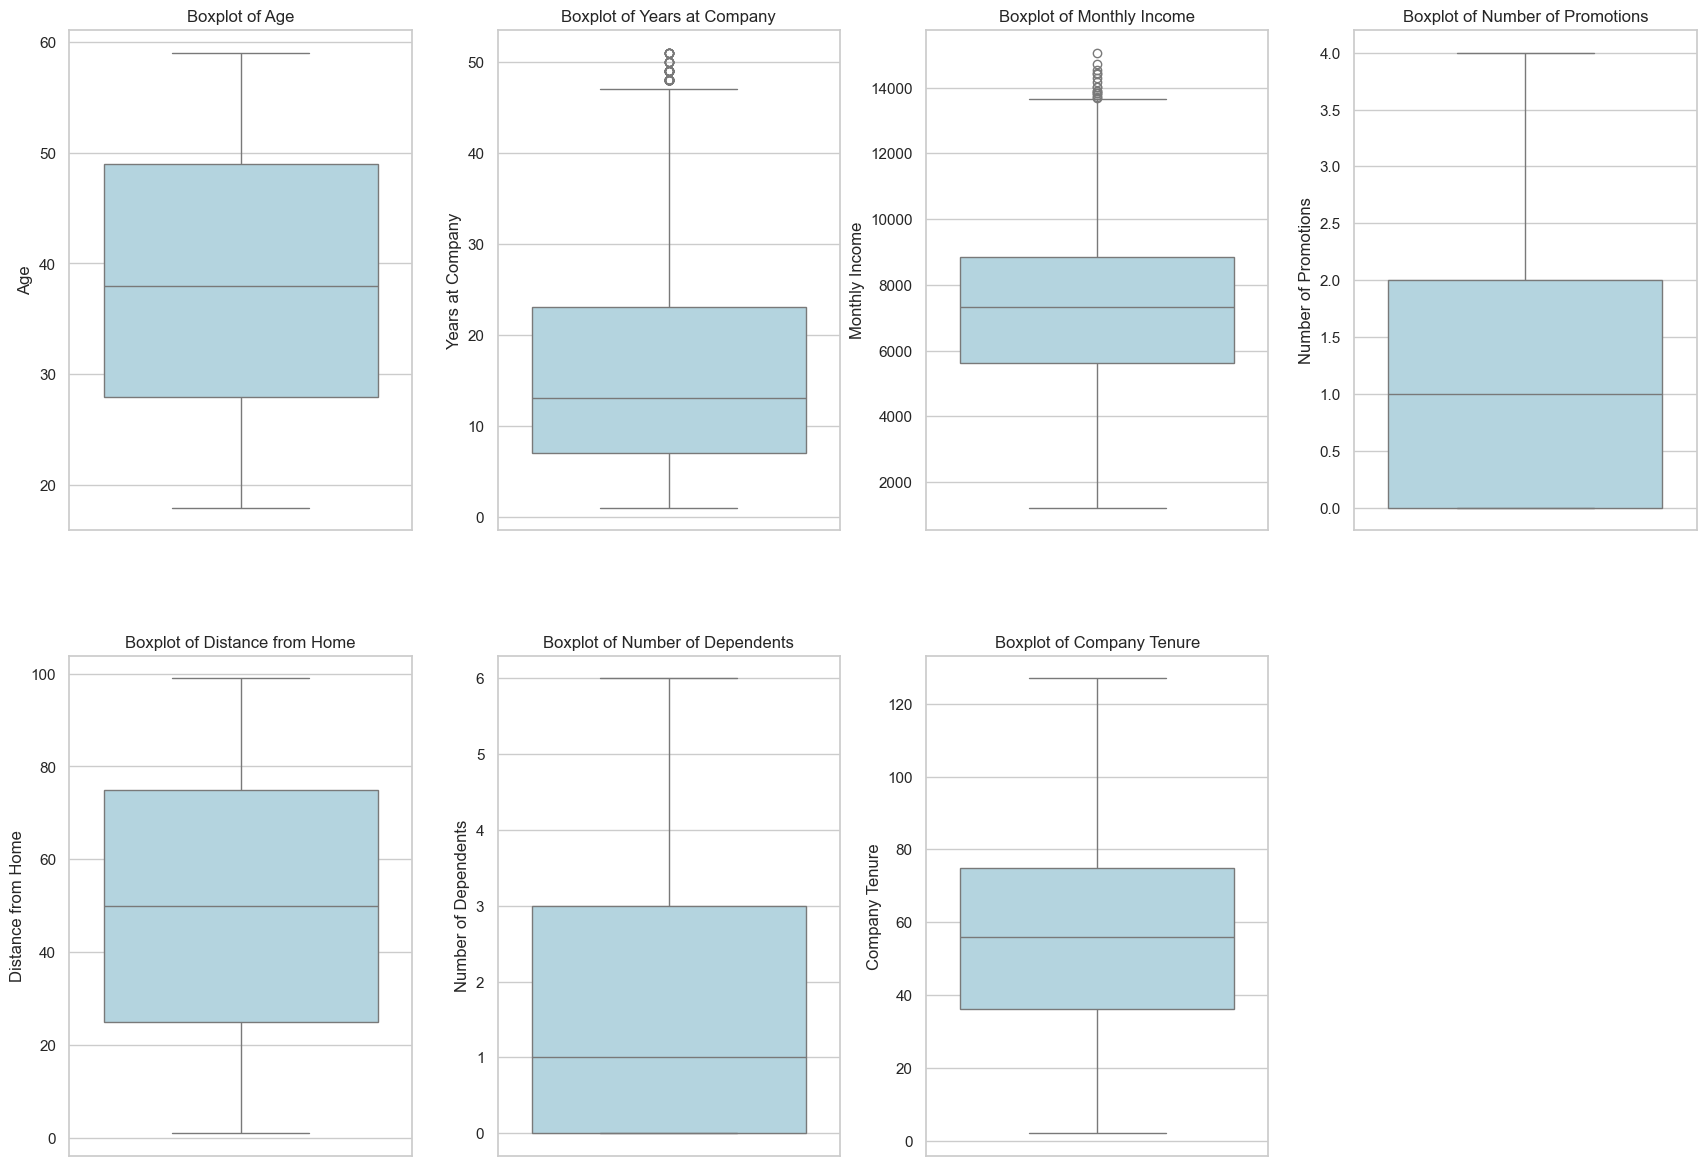

In [118]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(1, figsize=(21, 39)) 
n = 0

for col in numeric_df:
    n += 1
    plt.subplot(5, 4, n)
    plt.subplots_adjust(hspace=0.25, wspace=0.25)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')

plt.show()

Dari visualisasi di atas, terlihat bahwa terdapat outlier pada variabel Years at Company dan Monthly Income. 

Untuk mengatasi outlier, akan dibuat batas bawah dengan mengurangi Q1 dengan 1.5/IQR dan batas atas menambah 1.5/IQR dengan Q3.

Kemudian membuat rumus IQR (Inter Quartile Range) = Q3 - Q1

In [223]:
for col in numeric_df.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

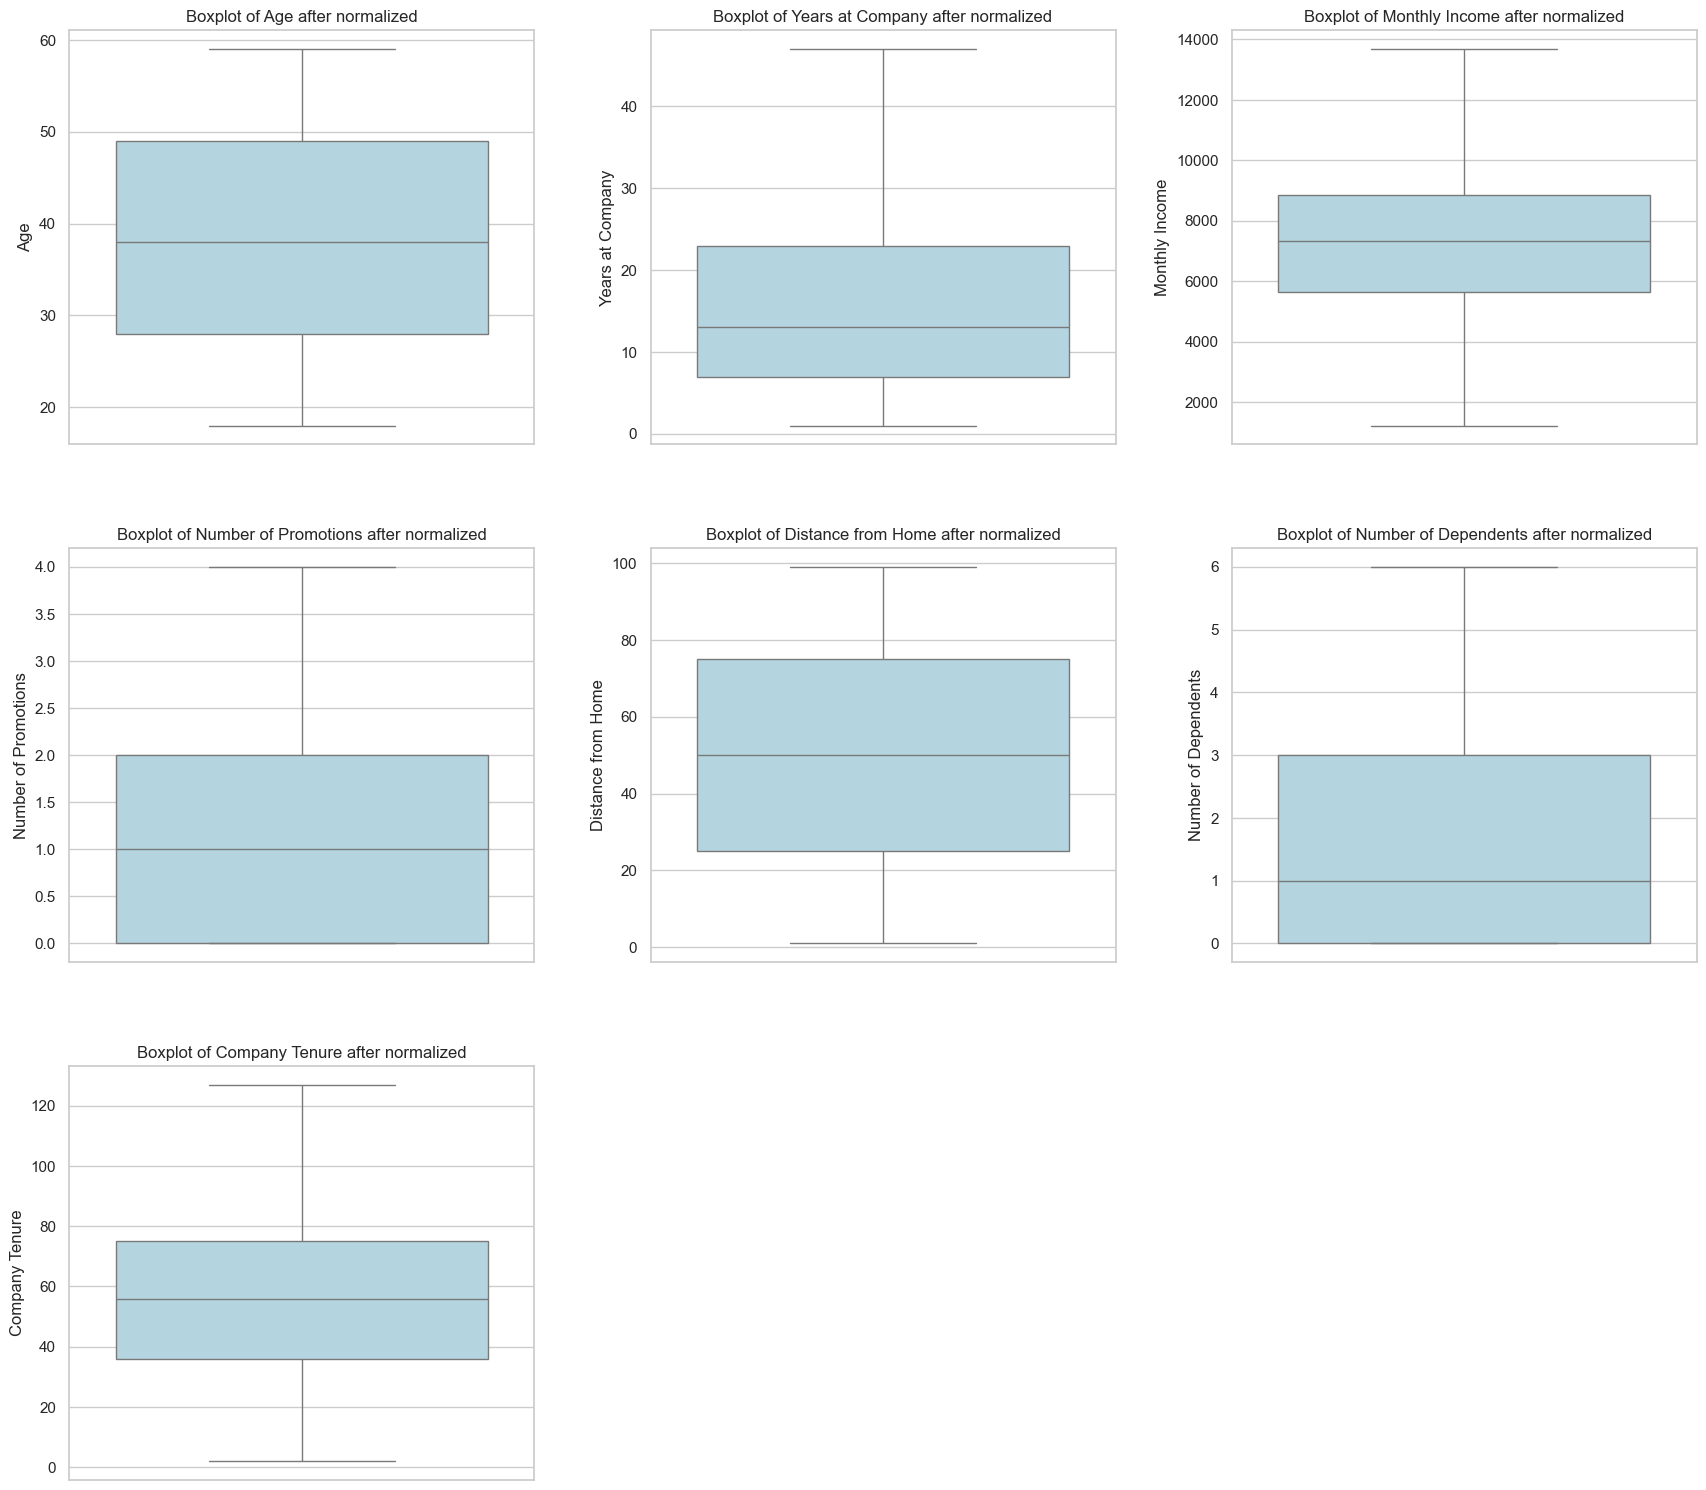

In [129]:
plt.figure(1, figsize=(21, 39)) 
n = 0

for col in numeric_df:
    n += 1
    plt.subplot(6, 3, n)
    plt.subplots_adjust(hspace=0.25, wspace=0.25)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'Boxplot of {col} after normalized')

Berdasarkan output diatas, terlihat bahwa sudah tidak ada outlier pada variabel numerik sehingga dapat dilakukan analisis selanjutnya.

#### 2.2.5 Univariate Analysis

##### a. Fitur Kategorik

**Distribusi Pemutusan Hubungan Kerja (attrition)**

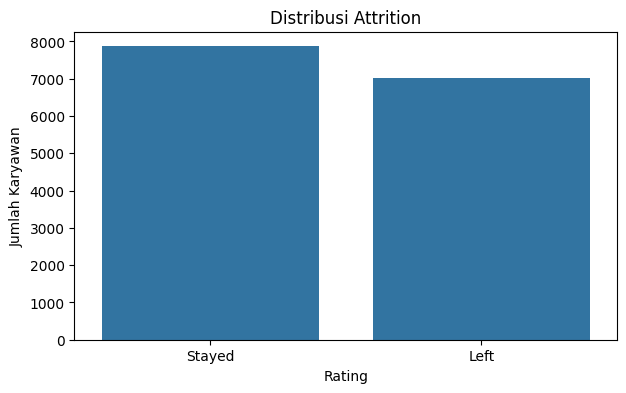

In [14]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Attrition')
plt.title("Distribusi Attrition")
plt.xlabel("Rating")
plt.ylabel("Jumlah Karyawan")
plt.show()

Visualisasi ini menunjukkan bahwa mayoritas karyawan memilih untuk tetap bekerja di perusahaan dibandingkan dengan mereka yang keluar.

**Distribusi Gender Pekerja**

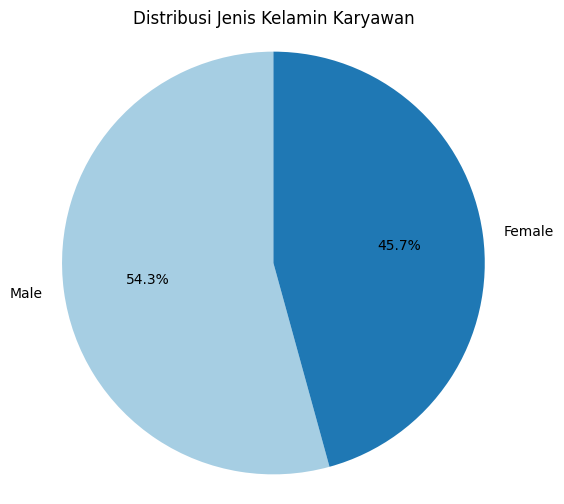

In [32]:
gender_counts = df['Gender'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Distribusi Jenis Kelamin Karyawan")
plt.axis('equal')
plt.show()

Berdasarkan diagram pie, terlihat bahwa karyawan perempuan (54,3%) mendominasi tenaga kerja di perusahaan ini dibandingkan laki-laki (45,7%). Komposisi ini menunjukkan bahwa perusahaan memiliki keberagaman gender, namun juga cenderung lebih banyak mempekerjakan perempuan.

**Distribusi Bidang Pekerjaan**

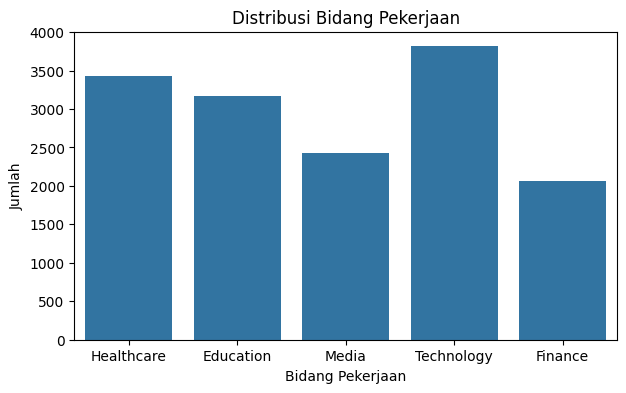

In [40]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Job Role')
plt.title("Distribusi Bidang Pekerjaan")
plt.xlabel("Bidang Pekerjaan")
plt.ylabel("Jumlah")
plt.show()

Visualisasi ini menunjukkan bahwa bidang Teknologi memiliki jumlah karyawan terbanyak, diikuti oleh Healthcare dan Education. Sementara itu, bidang Media dan Finance memiliki jumlah karyawan paling sedikit. 

**Distribusi Fitur Kepuasan Kerja Pekerja**

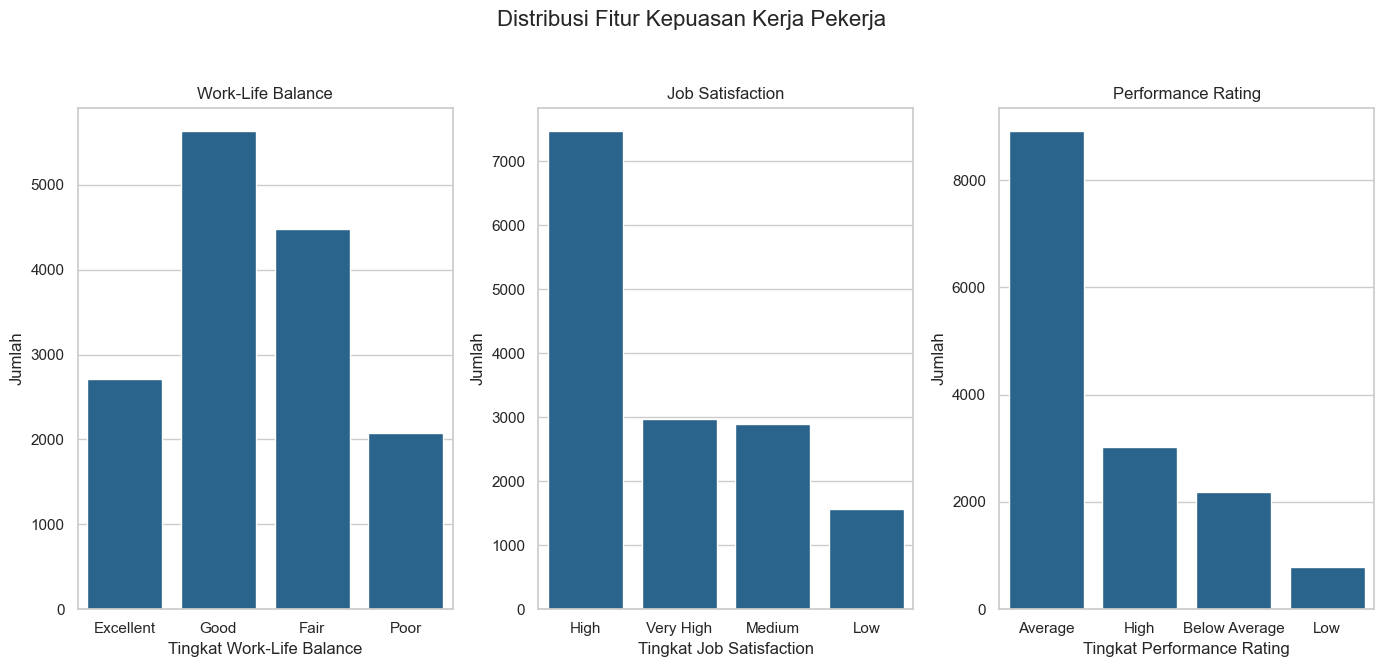

In [195]:
blue_color = "#1a669c"
fig, axes = plt.subplots(1, 3, figsize=(14, 7))
fig.suptitle("Distribusi Fitur Kepuasan Kerja Pekerja", fontsize=16)

# Plot 1 - Aspiration
sns.countplot(data=df, x='Work-Life Balance', ax=axes[0], color=blue_color)
axes[0].set_title('Work-Life Balance')
axes[0].set_ylabel('Jumlah')
axes[0].set_xlabel('Tingkat Work-Life Balance')

# Plot 2 - Number of Doors
sns.countplot(data=df, x='Job Satisfaction', ax=axes[1], color=blue_color)
axes[1].set_title('Job Satisfaction')
axes[1].set_ylabel('Jumlah')
axes[1].set_xlabel('Tingkat Job Satisfaction')

# Plot 3 - Fuel Type
sns.countplot(data=df, x='Performance Rating', ax=axes[2], color=blue_color)
axes[2].set_title('Performance Rating')
axes[2].set_ylabel('Jumlah')
axes[2].set_xlabel('Tingkat Performance Rating')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- Distribusi tingkat keseimbangan kerja dan kehidupan pribadi menunjukkan bahwa sebagian besar karyawan menilai kondisi mereka sebagai “Good”, disusul oleh “Fair”. Hanya sedikit karyawan yang merasakan work-life balance yang “Excellent” atau “Poor”. 
- Sebagian besar karyawan menilai tingkat kepuasan kerja mereka sebagai “High”, dengan jumlah yang jauh lebih sedikit berada pada kategori “Very High”, “Medium”, dan “Low”. Artinya, secara umum karyawan merasa puas terhadap pekerjaan mereka, meskipun tingkat kepuasan tertinggi belum banyak tercapai.
- Sebagian besar karyawan mendapatkan penilaian kinerja pada kategori “Average”. Sementara itu, hanya sebagian kecil yang berada di kategori “High”, “Below Average”, atau “Low”. Hal ini mengindikasikan bahwa penilaian performa cenderung berada di tengah, mungkin karena standar evaluasi yang moderat atau performa rata-rata karyawan yang merata.

**Distribusi Fitur Performa Kerja Pekerja**

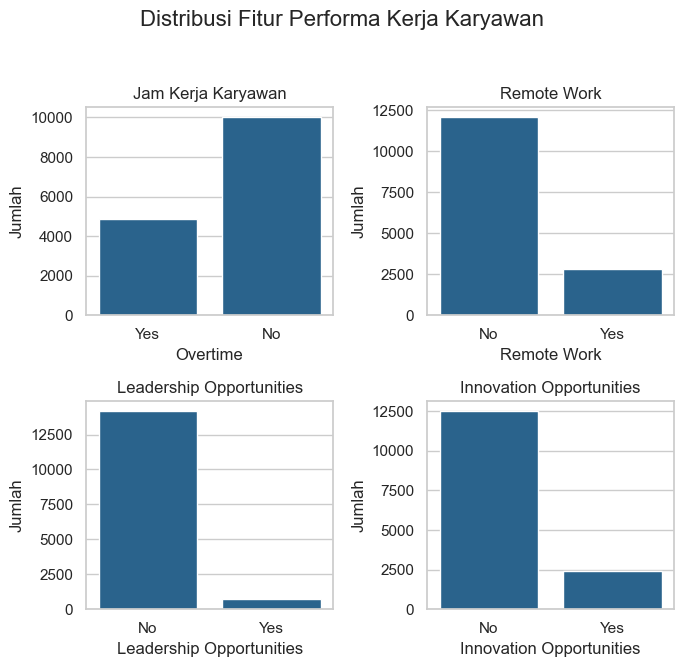

In [197]:
blue_color = "#1a669c"
fig, axes = plt.subplots(2, 2, figsize=(7, 7))
fig.suptitle("Distribusi Fitur Performa Kerja Karyawan", fontsize=16)

# Plot 1 - Aspiration
sns.countplot(data=df, x='Overtime', ax=axes[0, 0], color=blue_color)
axes[0, 0].set_title('Jam Kerja Karyawan')
axes[0, 0].set_ylabel('Jumlah')
axes[0, 0].set_xlabel('Overtime')

# Plot 2 - Number of Doors
sns.countplot(data=df, x='Remote Work', ax=axes[0, 1], color=blue_color)
axes[0, 1].set_title('Remote Work')
axes[0, 1].set_ylabel('Jumlah')
axes[0, 1].set_xlabel('Remote Work')

# Plot 3 - Fuel Type
sns.countplot(data=df, x='Leadership Opportunities', ax=axes[1, 0], color=blue_color)
axes[1, 0].set_title('Leadership Opportunities')
axes[1, 0].set_ylabel('Jumlah')
axes[1, 0].set_xlabel('Leadership Opportunities')

# Plot 4 - Engine Location
sns.countplot(data=df, x='Innovation Opportunities', ax=axes[1, 1], color=blue_color)
axes[1, 1].set_title('Innovation Opportunities')
axes[1, 1].set_ylabel('Jumlah')
axes[1, 1].set_xlabel('Innovation Opportunities')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- Mayoritas karyawan tidak bekerja lembur (overtime), menunjukkan bahwa sebagian besar beban kerja kemungkinan masih dalam batas normal. Hanya sebagian kecil karyawan yang bekerja melebihi jam kerja reguler.
- Kebanyakan karyawan tidak bekerja secara remote. Hal ini menunjukkan bahwa perusahaan cenderung mengadopsi sistem kerja on-site, meskipun ada sebagian kecil karyawan yang bekerja secara remote.
- Sebagian besar karyawan tidak memiliki peluang kepemimpinan, yang menunjukkan bahwa peran kepemimpinan mungkin masih terbatas pada level tertentu saja. Hanya sebagian kecil yang mendapatkan peluang tersebut.
- Distribusi juga menunjukkan bahwa mayoritas karyawan tidak memiliki peluang untuk berinovasi. Ini bisa menjadi indikator penting untuk evaluasi iklim inovasi di perusahaan.

**Distribusi Fitur Latar Belakang Pekerja**

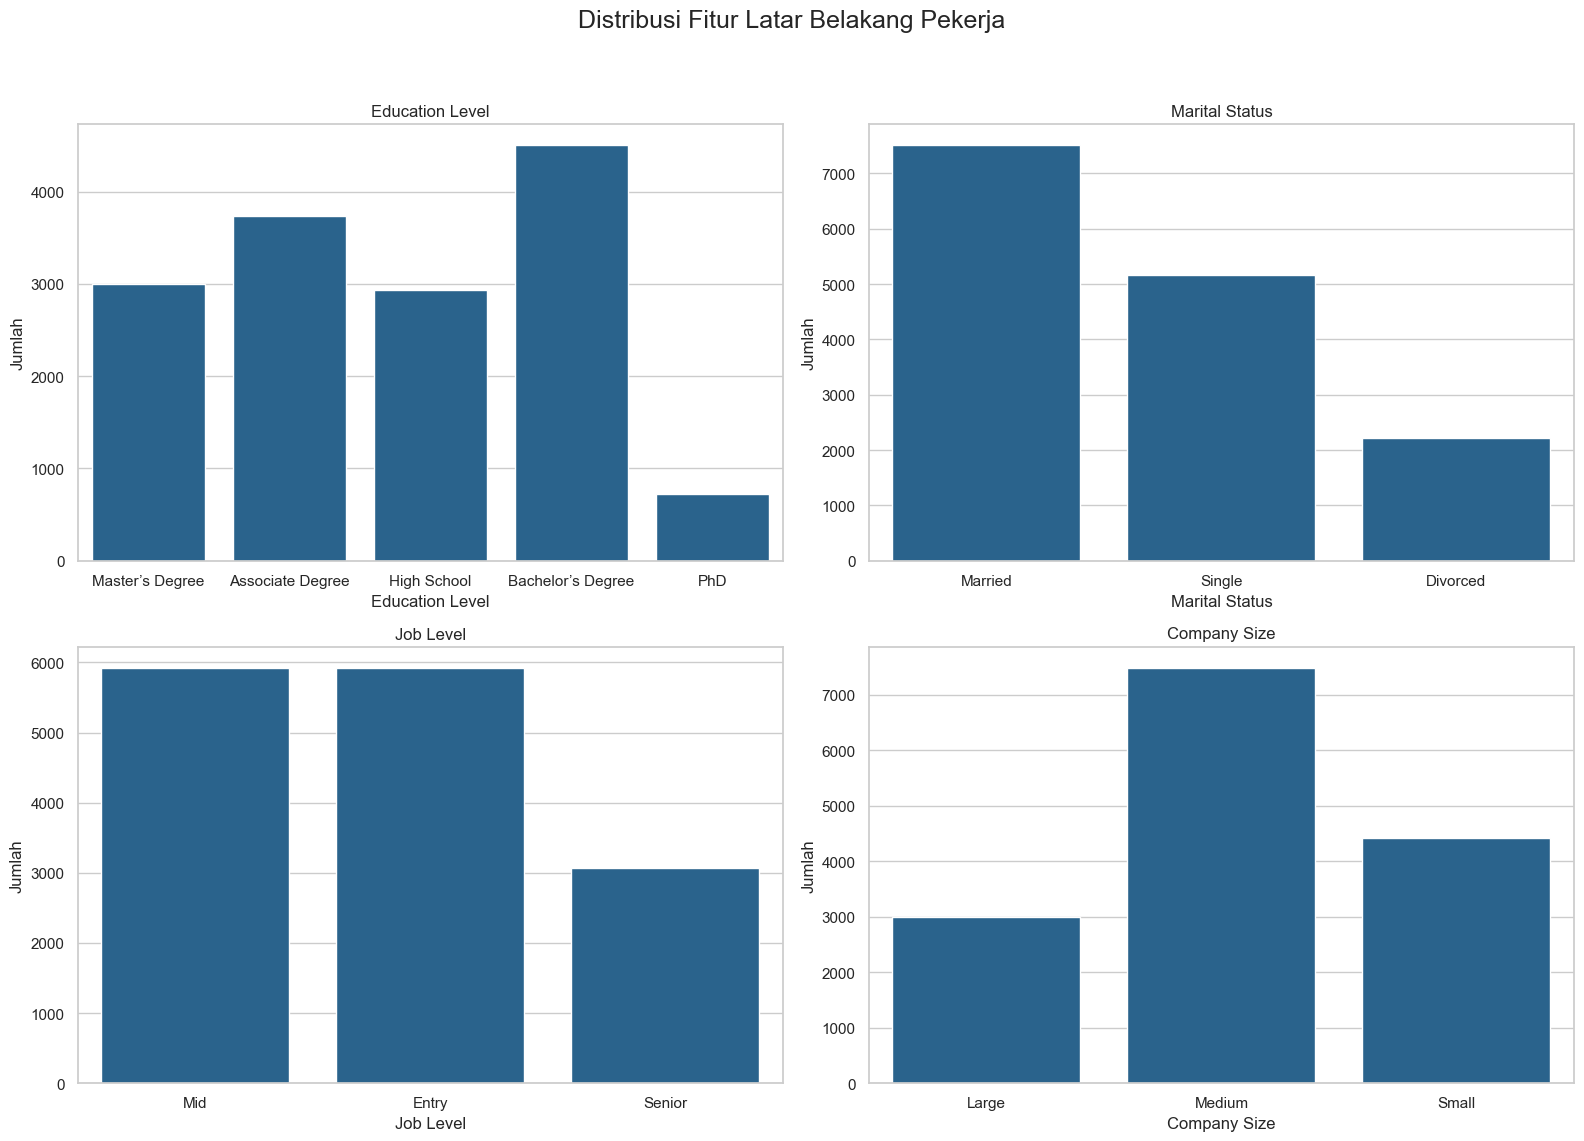

In [198]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Distribusi Fitur Latar Belakang Pekerja", fontsize=18)

# Plot 1 - Body Style
sns.countplot(data=df, x='Education Level', ax=axes[0, 0], color=blue_color)
axes[0, 0].set_title('Education Level')
axes[0, 0].set_ylabel('Jumlah')
axes[0, 0].set_xlabel('Education Level')

# Plot 2 - Drive Wheels
sns.countplot(data=df, x='Marital Status', ax=axes[0, 1], color=blue_color)
axes[0, 1].set_title('Marital Status')
axes[0, 1].set_ylabel('Jumlah')
axes[0, 1].set_xlabel('Marital Status')

# Plot 3 - Engine Type
sns.countplot(data=df, x='Job Level', ax=axes[1, 0], color=blue_color)
axes[1, 0].set_title('Job Level')
axes[1, 0].set_ylabel('Jumlah')
axes[1, 0].set_xlabel('Job Level')

# Plot 4 - Number of Fuel System
sns.countplot(data=df, x='Company Size', ax=axes[1, 1], color=blue_color)
axes[1, 1].set_title('Company Size')
axes[1, 1].set_ylabel('Jumlah')
axes[1, 1].set_xlabel('Company Size')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


- Sebagian besar karyawan memiliki tingkat pendidikan Bachelor’s Degree (Sarjana), disusul oleh Master’s Degree dan Associate Degree. Ini menunjukkan bahwa mayoritas tenaga kerja memiliki latar belakang pendidikan tinggi.
- Karyawan yang sudah menikah merupakan kelompok terbanyak, diikuti oleh yang lajang (single). Jumlah karyawan yang bercerai (divorced) relatif kecil. Komposisi ini menunjukkan bahwa sebagian besar karyawan berada dalam fase kehidupan yang mapan.
- Level pekerjaan terbanyak berada di tingkat “Entry” dan “Mid”, sedangkan posisi “Senior” jumlahnya jauh lebih sedikit. Ini menandakan perusahaan yang mayoritas diisi oleh level staf pelaksana dan menengah.
- Sebagian besar karyawan bekerja di perusahaan berukuran besar (Large), diikuti oleh medium, dan yang paling sedikit di perusahaan kecil (Small). Ini menunjukkan bahwa data cenderung didominasi oleh perusahaan besar.

##### b. Fitur Numerik

**Distribusi Usia Pekerja**

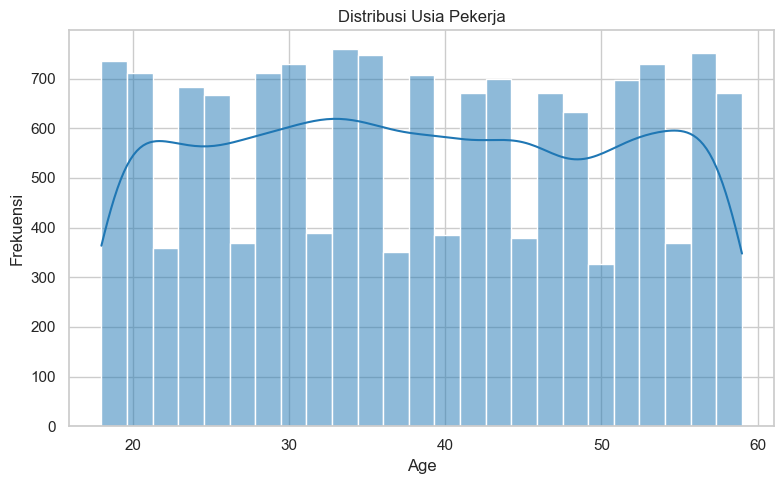

In [196]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True, color="#1f77b4")
plt.title('Distribusi Usia Pekerja')
plt.xlabel('Age')
plt.ylabel('Frekuensi')
plt.tight_layout()
plt.show()

Usia karyawan tersebar cukup merata antara 25 hingga 60 tahun, dengan jumlah terbanyak berada di rentang usia 30–35 tahun. Distribusi ini menunjukkan bahwa perusahaan mempekerjakan tenaga kerja dari berbagai generasi, dengan dominasi usia produktif muda.

**Distribusi Lama Bekerja di Perusahaan**

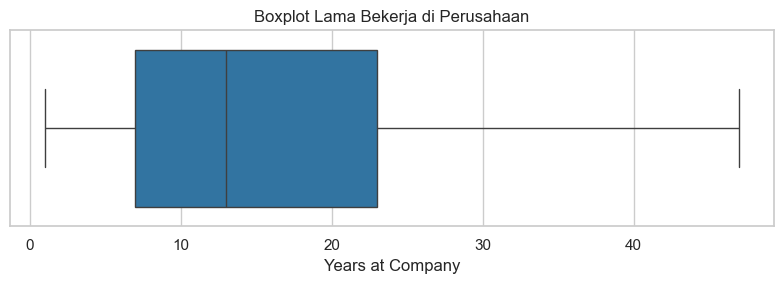

In [63]:
plt.figure(figsize=(8, 3))
sns.boxplot(x=df['Years at Company'], color="#1f77b4")
plt.title('Boxplot Lama Bekerja di Perusahaan')
plt.xlabel('Years at Company')
plt.tight_layout()
plt.show()

Boxplot memperlihatkan bahwa sebagian besar karyawan memiliki masa kerja antara 3 hingga 10 tahun, dengan median sekitar 5–6 tahun. Terdapat beberapa outlier yang menunjukkan adanya karyawan dengan masa kerja yang sangat panjang, bahkan mungkin lebih dari 20 tahun. Ini menandakan adanya kombinasi antara karyawan baru dan yang sudah sangat berpengalaman.


**Distribusi Penghasilan Bulanan**

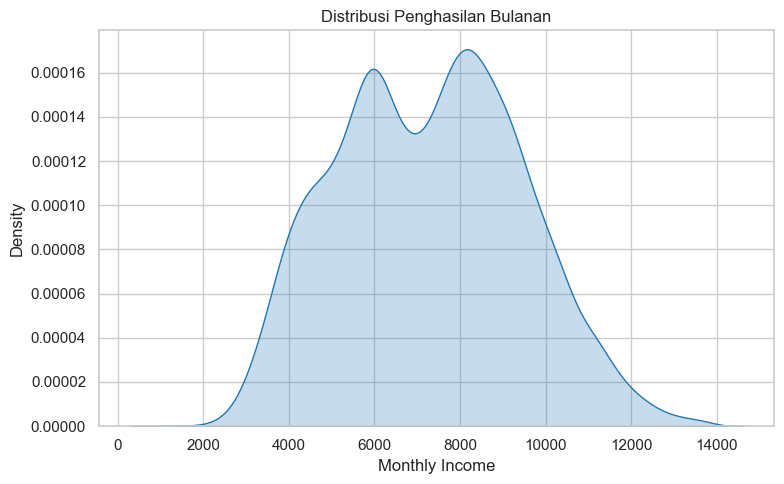

In [64]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['Monthly Income'], fill=True, color="#1f77b4")
plt.title('Distribusi Penghasilan Bulanan')
plt.xlabel('Monthly Income')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

Kurva distribusi menunjukkan dua puncak (bimodal), yang mengindikasikan adanya dua kelompok penghasilan utama dalam perusahaan. Penghasilan terbanyak berada di kisaran 5.000 hingga 9.000 satuan USD.

**Distribusi Jarak Perusahaan ke Rumah**

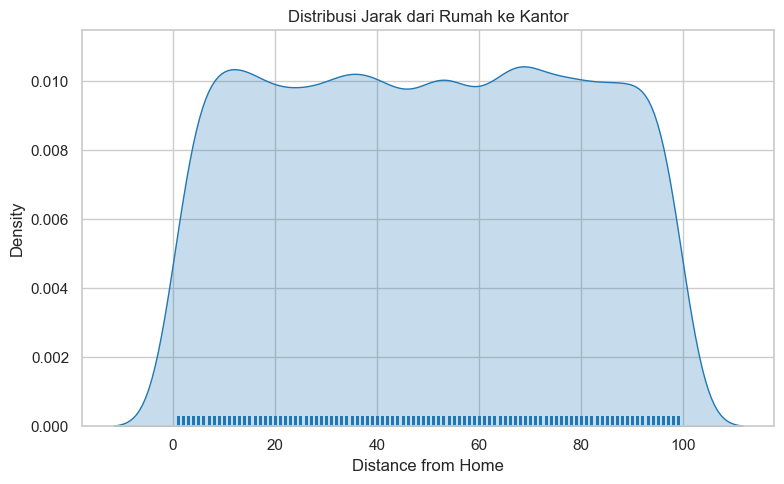

In [67]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df['Distance from Home'], fill=True, color="#1f77b4")
sns.rugplot(df['Distance from Home'], color="#1f77b4")
plt.title('Distribusi Jarak dari Rumah ke Kantor')
plt.xlabel('Distance from Home')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

Jarak rumah ke kantor relatif tersebar merata hingga sekitar 100 km. Ini menunjukkan bahwa karyawan datang dari berbagai lokasi, baik dekat maupun jauh dari kantor.

#### 2.2.6 Bivariate Analysis

**Korelasi Antar Variabel Numerik**

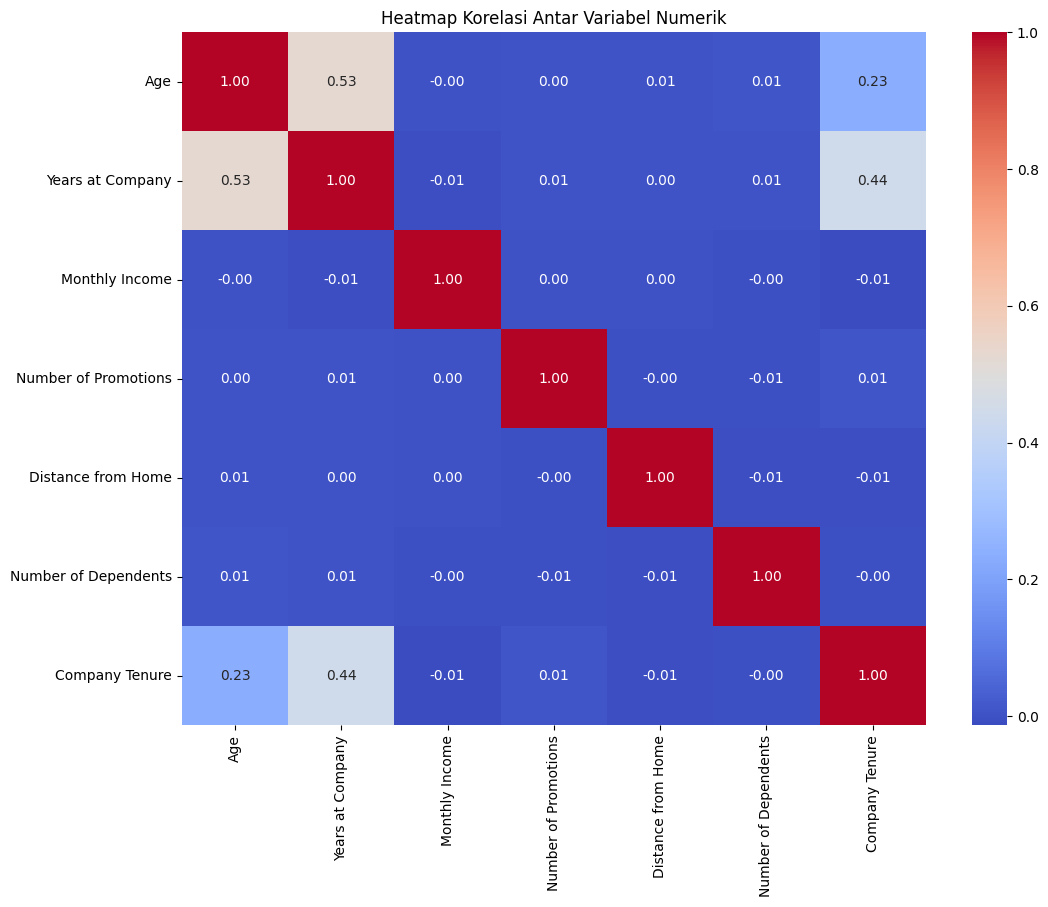

In [43]:
correlation = df.corr(numeric_only=True)

plt.figure(figsize=(12, 9))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()

Heatmap korelasi menunjukkan hubungan paling kuat antara “Years at Company” dengan “Age”, serta dengan “Company Tenure”. Ini logis karena semakin lama seseorang bekerja di perusahaan, biasanya semakin lama pula mereka berada dalam peran atau bidang yang sama.

**Distribusi Lama Kerja berdasarkan Kelompok Usia**

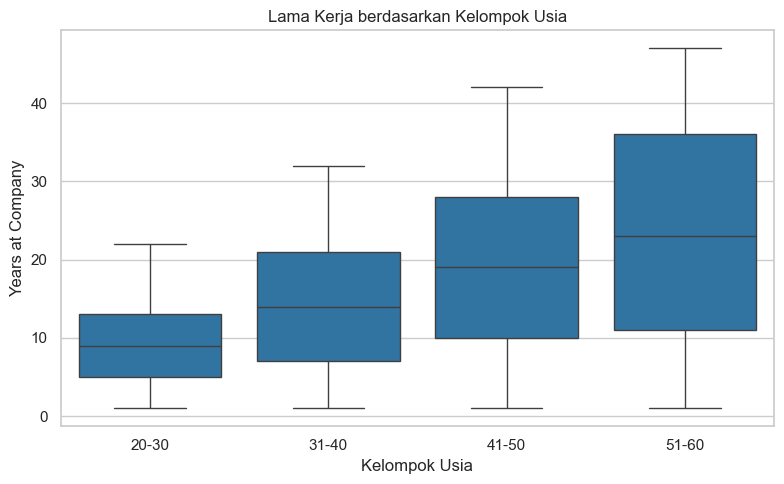

In [69]:
df['Age Group'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60], labels=['20-30', '31-40', '41-50', '51-60'])

plt.figure(figsize=(8, 5))
sns.boxplot(x='Age Group', y='Years at Company', data=df, color='#1f77b4')
plt.title('Lama Kerja berdasarkan Kelompok Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Years at Company')
plt.tight_layout()
plt.show()

Boxplot menunjukkan bahwa semakin tua usia karyawan, semakin lama mereka bekerja di perusahaan. Kelompok usia 51–60 tahun memiliki masa kerja paling lama, sementara kelompok usia 20–30 tahun memiliki masa kerja paling pendek.

**Distribusi Variabel Numerik berdasarkan Atrittion**

C:\Users\Acer\AppData\Local\Temp\ipykernel_22048\3450636751.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, ax=axes[i], palette=color_palette)
C:\Users\Acer\AppData\Local\Temp\ipykernel_22048\3450636751.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, ax=axes[i], palette=color_palette)
C:\Users\Acer\AppData\Local\Temp\ipykernel_22048\3450636751.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, ax=axes[i], palette=color_palette)
C:\Users\A

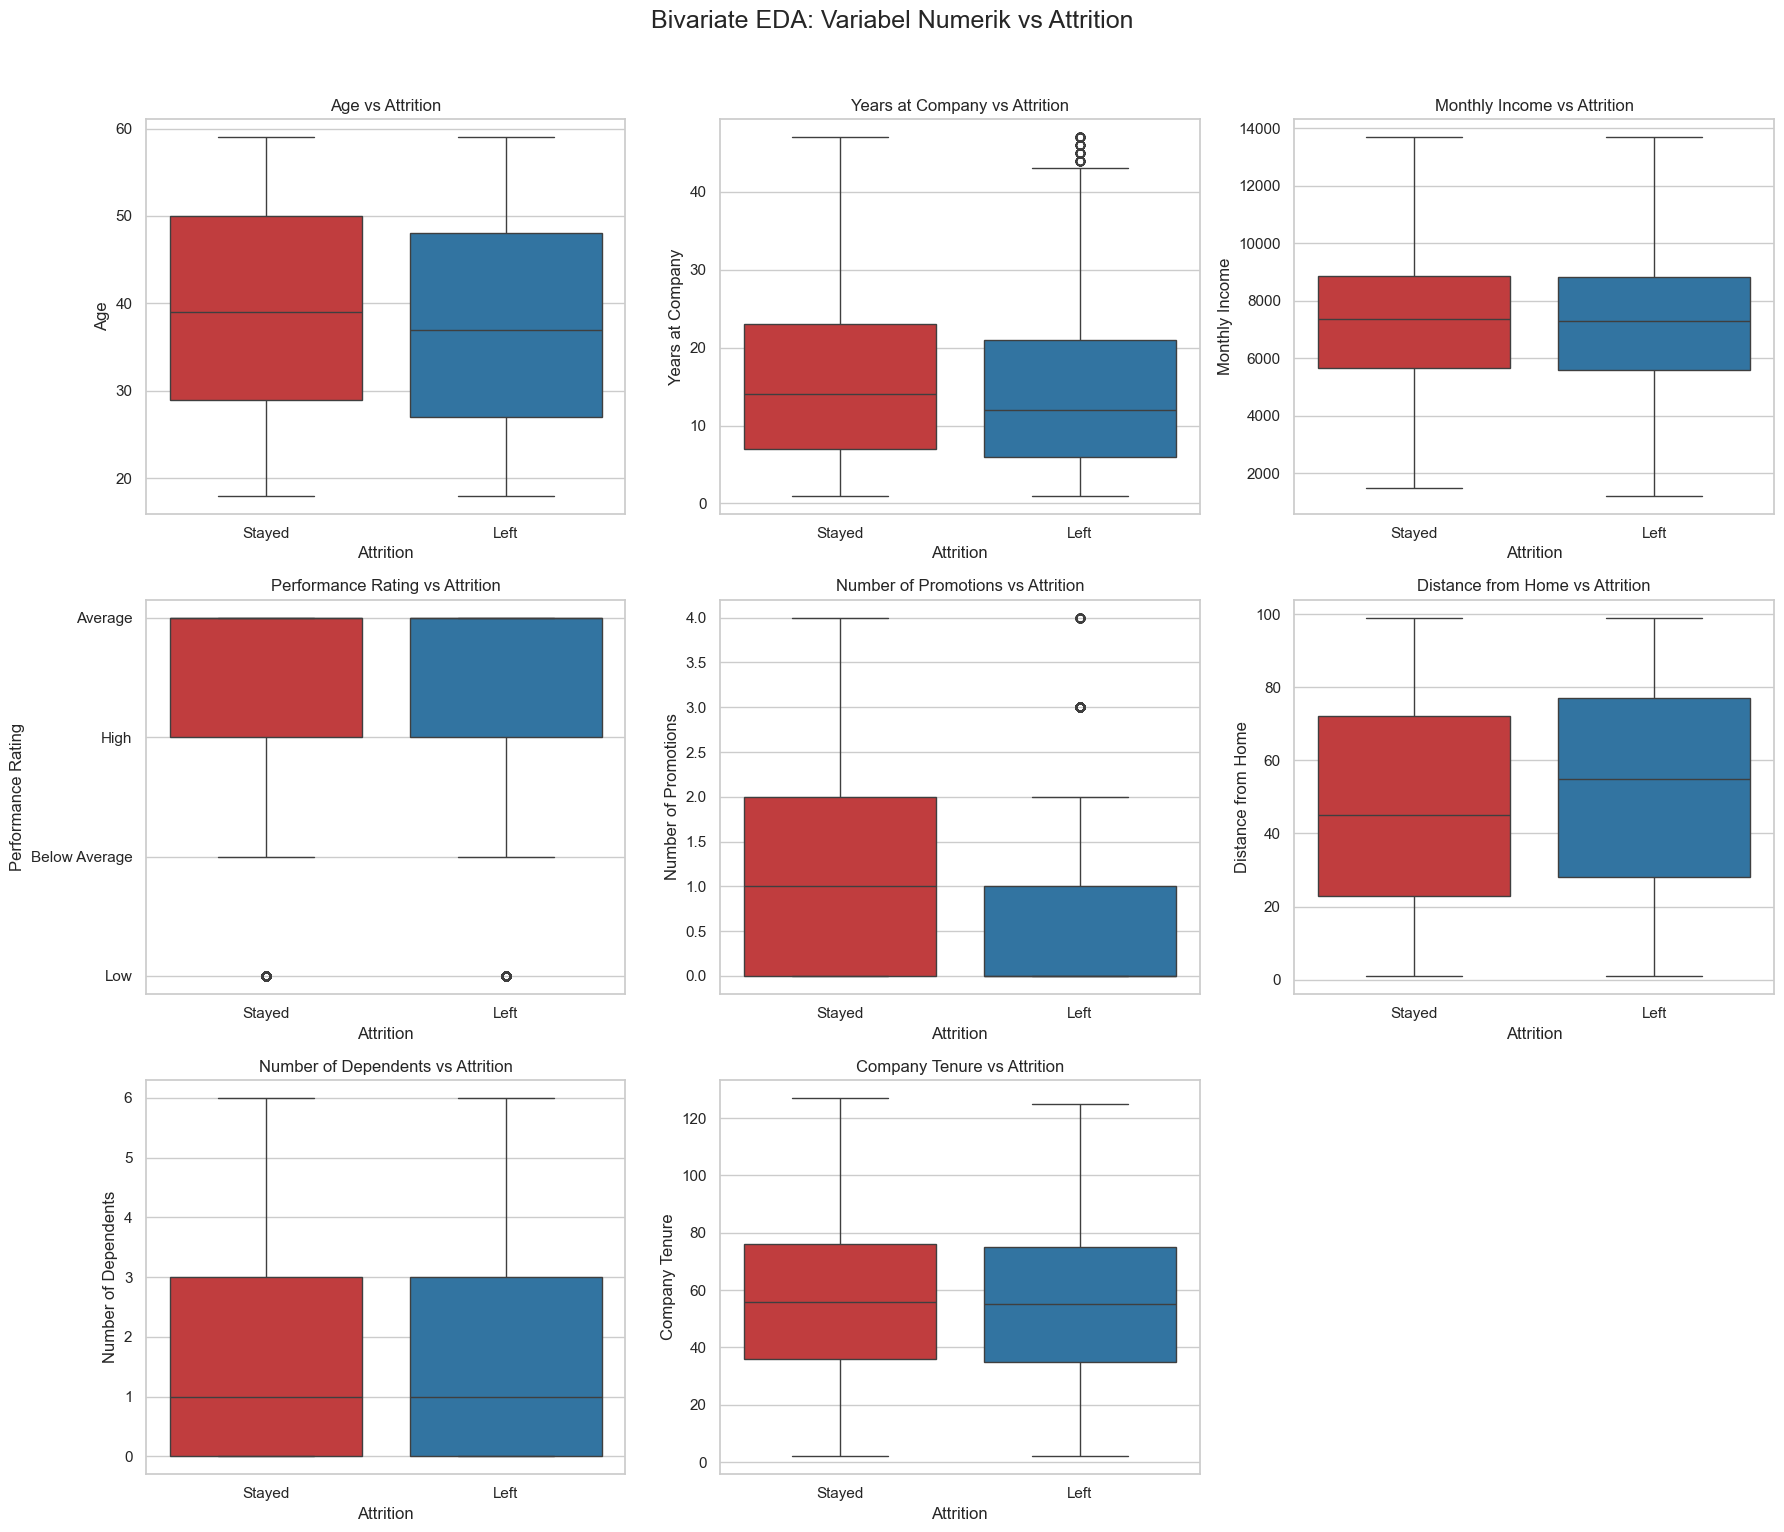

In [75]:
numerical_vars = [
    'Age', 'Years at Company', 'Monthly Income', 'Performance Rating',
    'Number of Promotions', 'Distance from Home', 'Number of Dependents', 'Company Tenure'
]

n_cols = 3
n_rows = (len(numerical_vars) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
fig.suptitle("Bivariate EDA: Variabel Numerik vs Attrition", fontsize=18, y=1.02)

axes = axes.flatten()

# Definisikan warna: stayed = biru, left = merah
color_palette = {"Left": "#1f77b4", "Stayed": "#d62728"}  # No = stayed (biru), Yes = left (merah)

for i, col in enumerate(numerical_vars):
    sns.boxplot(data=df, x='Attrition', y=col, ax=axes[i], palette=color_palette)
    axes[i].set_title(f'{col} vs Attrition')
    axes[i].set_xlabel('Attrition')
    axes[i].set_ylabel(col)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

1. Age vs Attrition
Rata-rata usia karyawan yang keluar sedikit lebih rendah dibandingkan dengan yang bertahan. Ini menunjukkan bahwa karyawan yang lebih muda cenderung lebih mudah meninggalkan perusahaan.

2. Years at Company vs Attrition
Karyawan yang bertahan cenderung memiliki masa kerja lebih lama dibandingkan dengan mereka yang keluar. Hal ini wajar karena masa kerja yang pendek bisa menjadi indikator ketidaknyamanan atau ketidakcocokan.

3. Monthly Income vs Attrition
Karyawan yang keluar memiliki pendapatan bulanan yang sedikit lebih rendah dibandingkan yang bertahan. Ini bisa mengindikasikan bahwa gaji berpengaruh terhadap keputusan keluar.

4. Performance Rating vs Attrition
Tidak terlihat perbedaan signifikan dalam distribusi penilaian kinerja antara yang bertahan dan keluar, artinya attrition tidak terlalu dipengaruhi oleh penilaian kinerja langsung.

5. Number of Companies Worked vs Attrition
Karyawan yang keluar memiliki riwayat bekerja di lebih banyak perusahaan sebelumnya. Ini bisa menandakan pola job-hopping atau ketidaksetiaan terhadap satu tempat kerja.

6. Distance from Home vs Attrition
Tidak terlihat perbedaan yang signifikan. Artinya, jarak tempat tinggal ke kantor bukan faktor utama yang memengaruhi keputusan keluar.

7. Number of Opportunities vs Attrition
Distribusi relatif mirip, sehingga peluang yang tersedia tampaknya bukan faktor utama dalam attrition.

8. Company Tenure vs Attrition
Masa kerja total di perusahaan cenderung lebih pendek pada karyawan yang keluar, sejalan dengan temuan dari fitur “Years at Company”.

**Fitur Kepuasan Kerja vs Attrition**

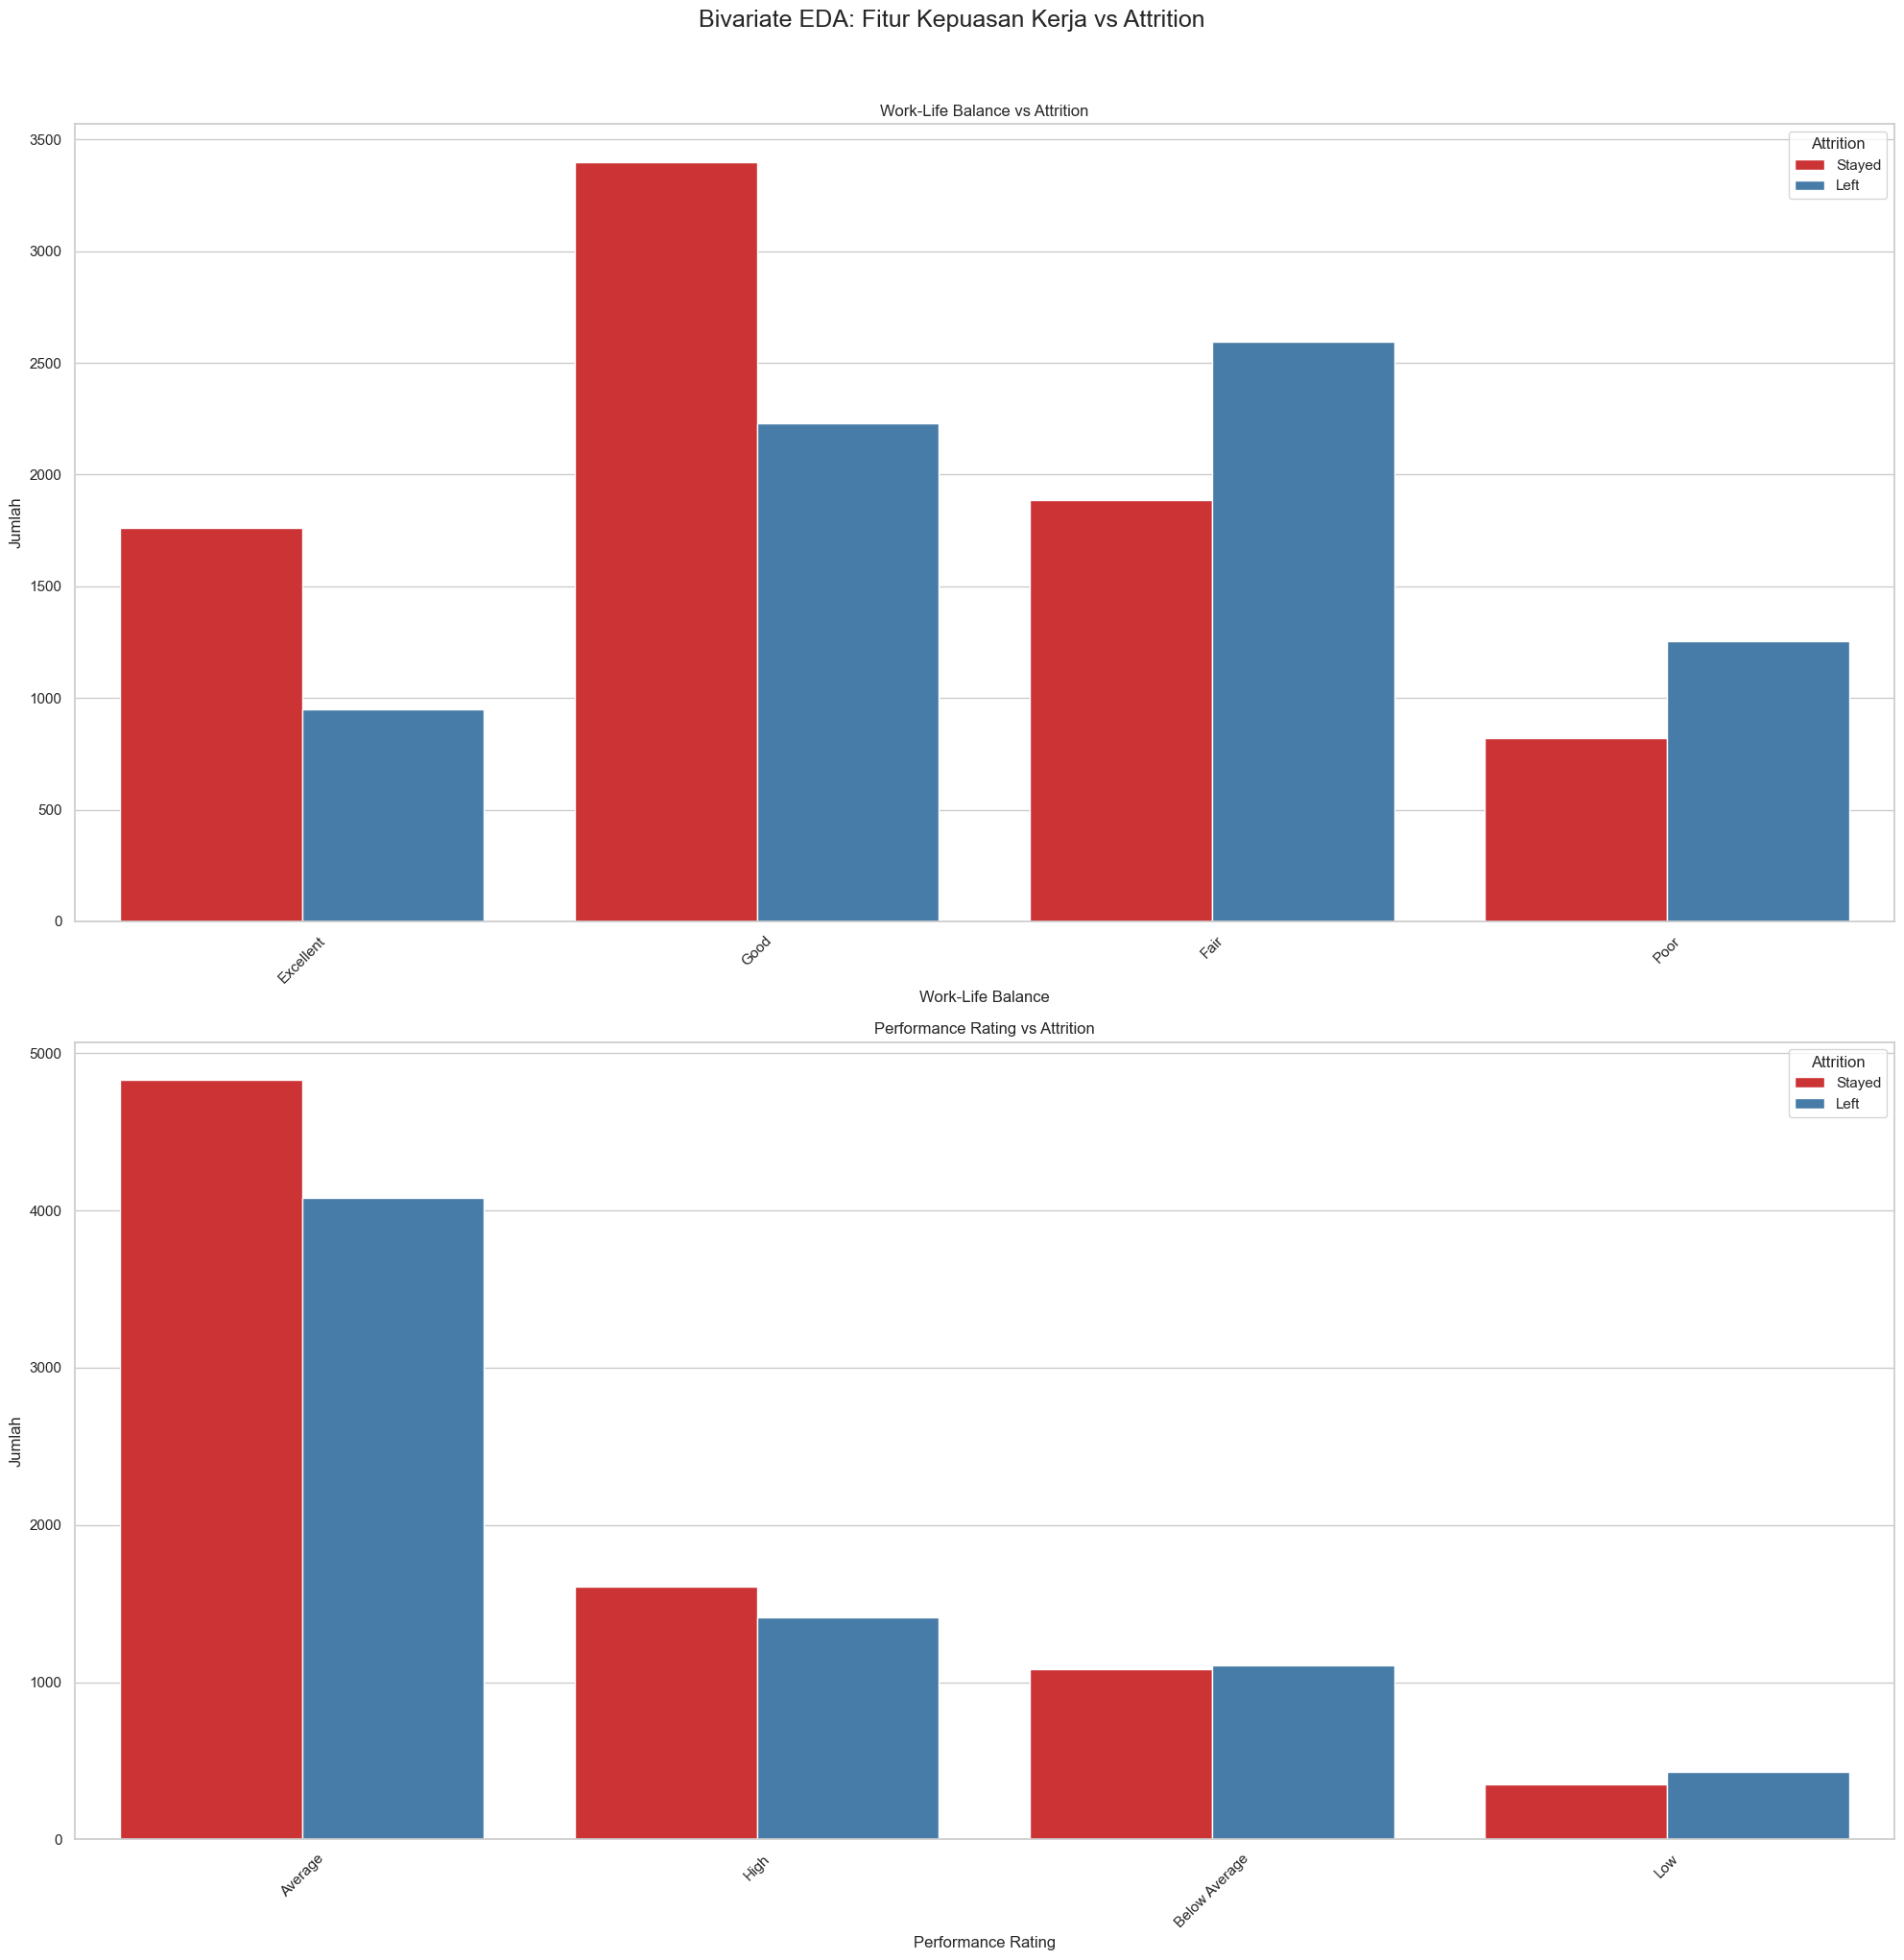

In [206]:
categorical_vars = [
    'Work-Life Balance','Performance Rating'
]

n_cols = 1
n_rows = (len(categorical_vars) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10 * n_rows))
fig.suptitle("Bivariate EDA: Fitur Kepuasan Kerja vs Attrition", fontsize=18, y=1.02)

axes = axes.flatten()

for i, col in enumerate(categorical_vars):
    sns.countplot(data=df, x=col, hue='Attrition', ax=axes[i], palette='Set1')
    axes[i].set_title(f'{col} vs Attrition')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Jumlah')
    axes[i].tick_params(axis='x', rotation=45)

# Matikan sumbu kosong jika ada
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

1. Work Life Balance vs Attrition
Hampir semua jenis pekerjaan menunjukkan jumlah attrition yang cukup besar, tetapi perbedaan antara yang bertahan dan keluar relatif seimbang, kecuali pada teknologi dan finance yang menunjukkan sedikit lebih banyak yang bertahan.

2. Performance Rating vs Attrition
Karyawan dengan penilaian “Average” mendominasi baik yang keluar maupun bertahan. Mereka dengan “High” rating cenderung bertahan.

**Fitur Performa Jabtan vs Attrition**

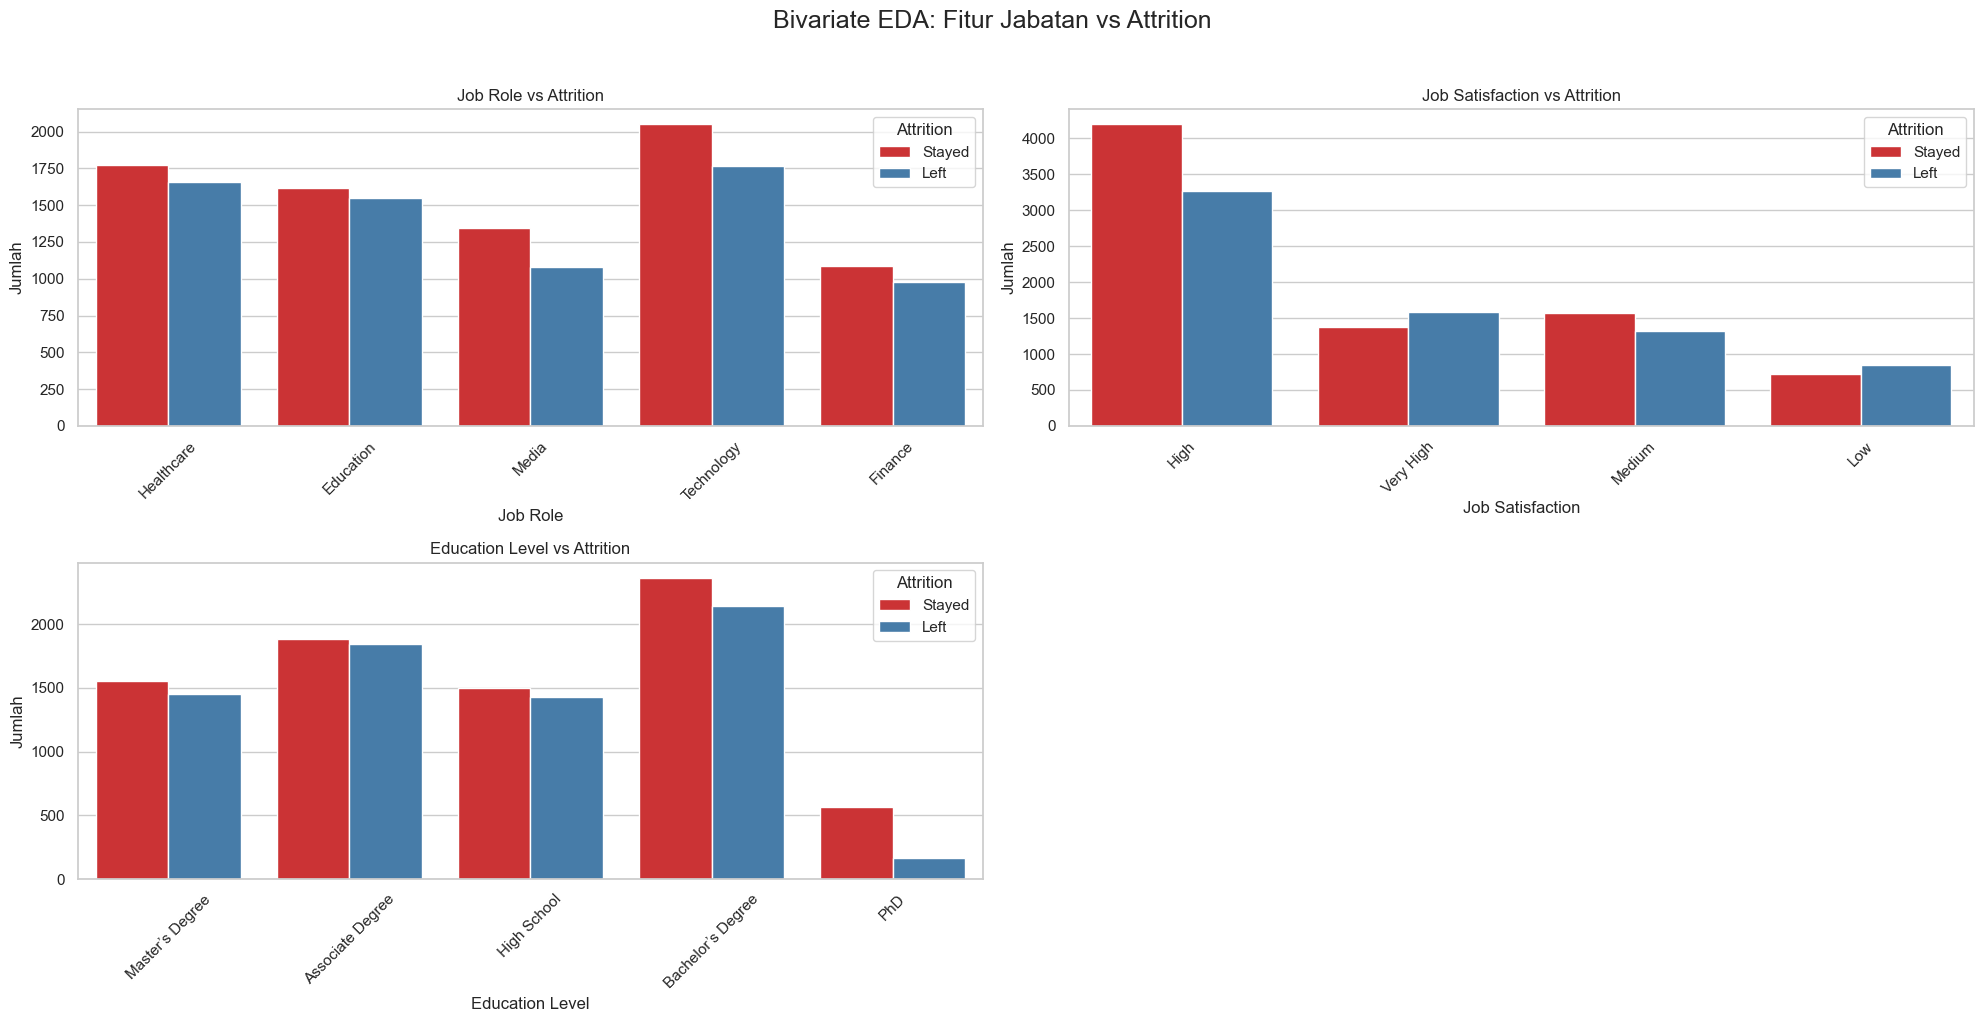

In [207]:
# Daftar variabel kategorikal
categorical_vars = [
    'Job Role', 'Job Satisfaction',
    'Education Level',
]

n_cols = 2
n_rows = (len(categorical_vars) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
fig.suptitle("Bivariate EDA: Fitur Jabatan vs Attrition", fontsize=18, y=1.02)

axes = axes.flatten()

for i, col in enumerate(categorical_vars):
    sns.countplot(data=df, x=col, hue='Attrition', ax=axes[i], palette='Set1')
    axes[i].set_title(f'{col} vs Attrition')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Jumlah')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

1. Job Role vs Attrition
Hampir semua jenis pekerjaan menunjukkan jumlah attrition yang cukup besar, tetapi perbedaan antara yang bertahan dan keluar relatif seimbang, kecuali pada teknologi dan finance yang menunjukkan sedikit lebih banyak yang bertahan.

2. Job Satisfaction vs Attrition
Karyawan dengan kepuasan kerja tinggi cenderung bertahan, sedangkan mereka yang puas sedang atau rendah lebih rentan keluar.

3. Education Level vs Attrition
Tidak ada pola yang sangat mencolok, tetapi lulusan sarjana (Bachelor’s) memiliki jumlah attrition lebih tinggi dibandingkan lainnya, mungkin karena jumlah mereka juga lebih besar secara umum.

**Performa Kerja vs Attrition**

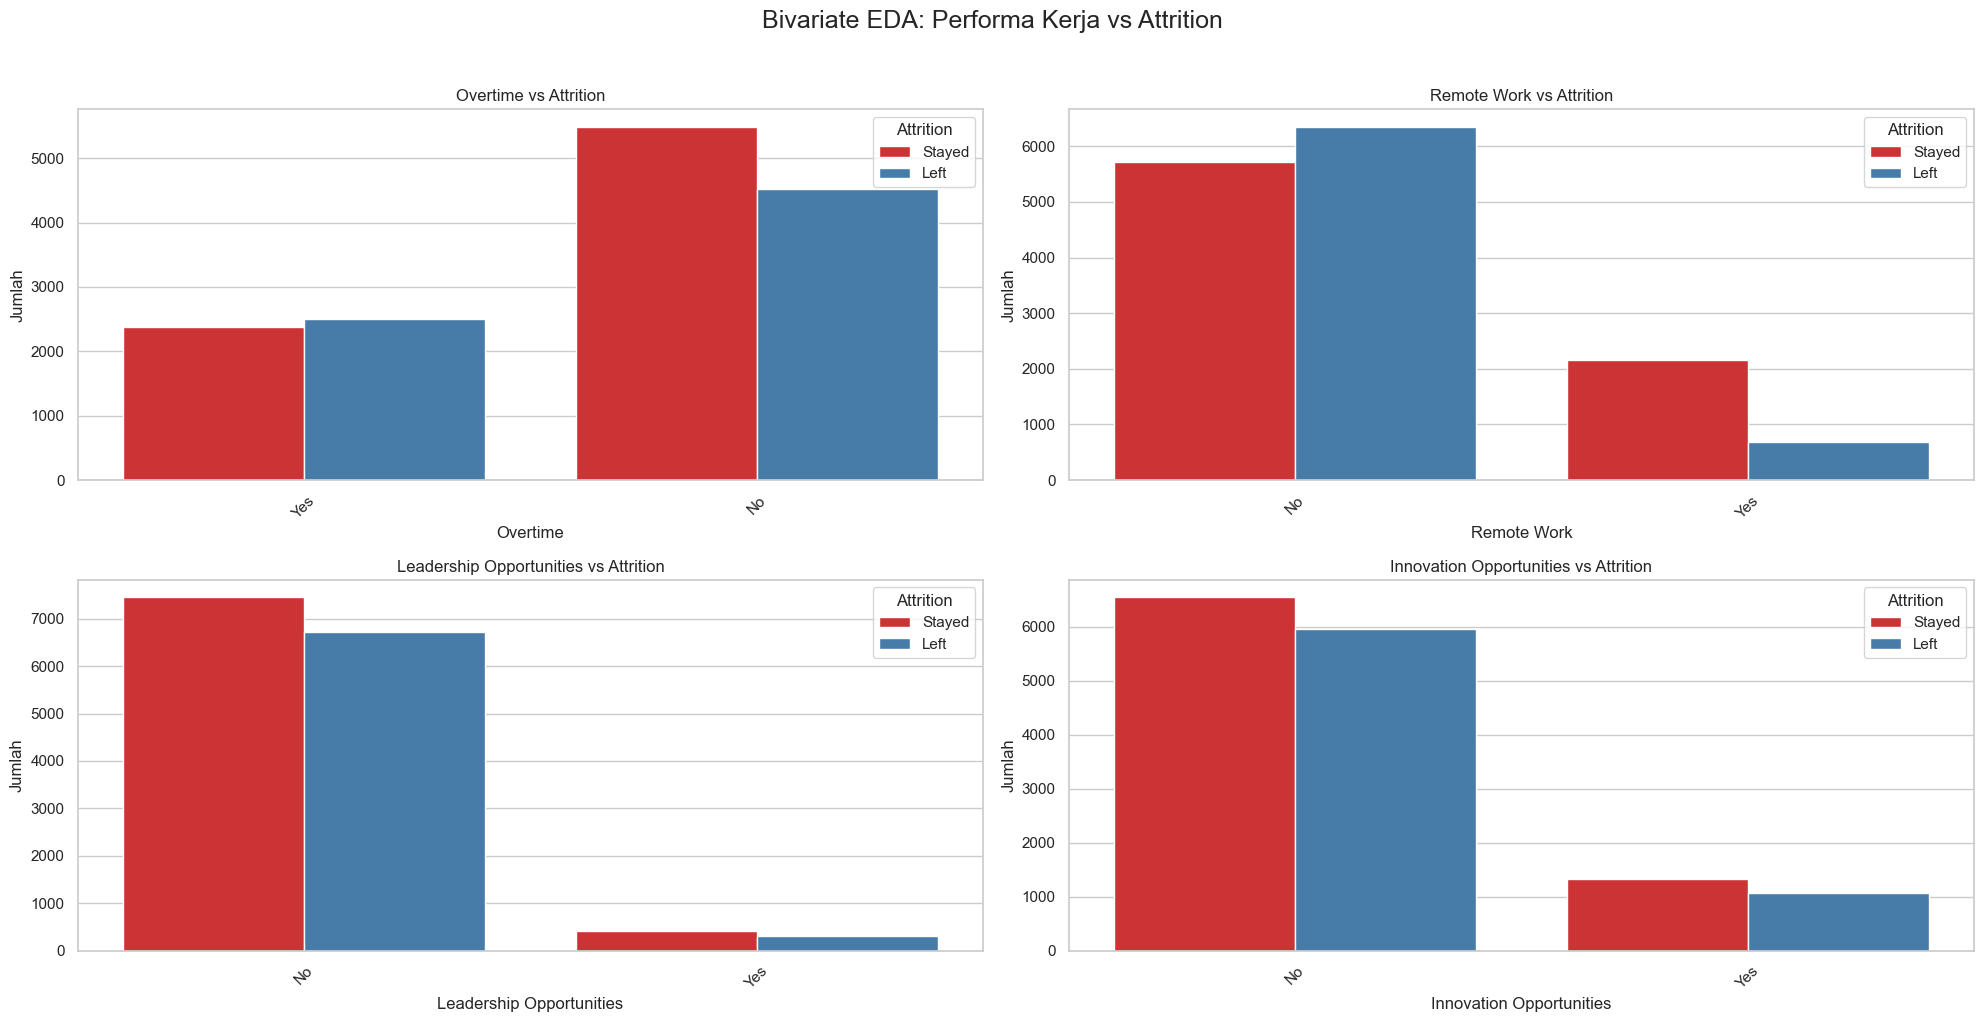

In [201]:
categorical_vars = [
    'Overtime', 'Remote Work', 
    'Leadership Opportunities', 'Innovation Opportunities'
]

n_cols = 2
n_rows = (len(categorical_vars) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
fig.suptitle("Bivariate EDA: Performa Kerja vs Attrition", fontsize=18, y=1.02)

axes = axes.flatten()

for i, col in enumerate(categorical_vars):
    sns.countplot(data=df, x=col, hue='Attrition', ax=axes[i], palette='Set1')
    axes[i].set_title(f'{col} vs Attrition')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Jumlah')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

1. Overtime vs Attrition
Proporsi attrition jauh lebih tinggi pada karyawan yang bekerja lembur, menunjukkan bahwa beban kerja berlebih mendorong keinginan untuk keluar.

2. Remote Work vs Attrition
Karyawan yang bekerja remote lebih sedikit yang keluar dibandingkan yang bekerja on-site. Ini menunjukkan bahwa fleksibilitas kerja berkontribusi pada retensi.

3. Leadership Opportunities vs Attrition
Karyawan yang memiliki peluang kepemimpinan cenderung bertahan, sementara mereka yang tidak memiliki peluang tersebut lebih cenderung keluar.

4. Innovation Opportunities vs Attrition
Karyawan dengan peluang inovasi juga menunjukkan tingkat attrition yang lebih rendah, mengindikasikan pentingnya keterlibatan dalam proses kreatif.

**Fitur Latar Belakang Pekerja vs Attrition**

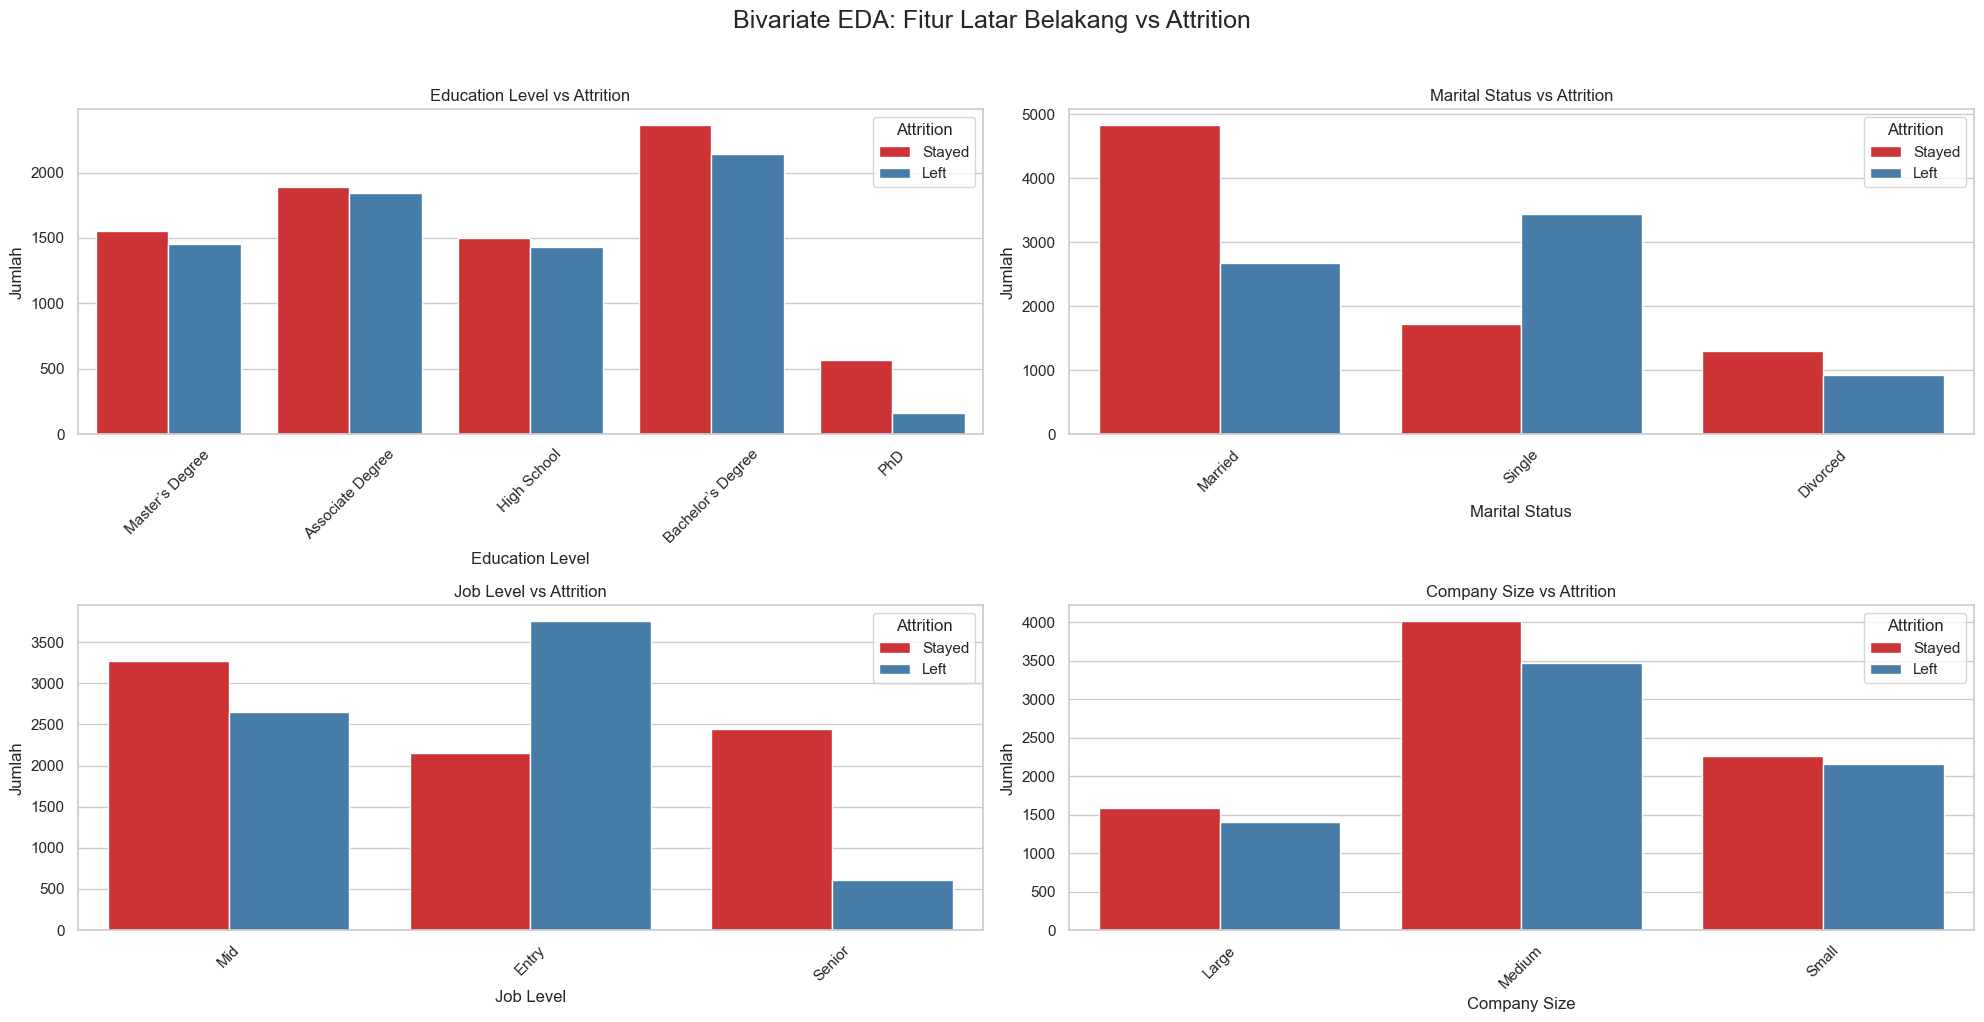

In [202]:
categorical_vars = [
    'Education Level', 'Marital Status', 'Job Level', 'Company Size'
]

n_cols = 2
n_rows = (len(categorical_vars) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
fig.suptitle("Bivariate EDA: Fitur Latar Belakang vs Attrition", fontsize=18, y=1.02)

axes = axes.flatten()

for i, col in enumerate(categorical_vars):
    sns.countplot(data=df, x=col, hue='Attrition', ax=axes[i], palette='Set1')
    axes[i].set_title(f'{col} vs Attrition')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Jumlah')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

1. Education Level vs Attrition
Tidak ada pola yang sangat mencolok, tetapi lulusan sarjana (Bachelor’s) memiliki jumlah attrition lebih tinggi dibandingkan lainnya, mungkin karena jumlah mereka juga lebih besar secara umum.

2. Marital Status vs Attrition
Karyawan lajang memiliki tingkat keluar lebih tinggi dibandingkan yang sudah menikah. Hal ini bisa dikaitkan dengan kebutuhan stabilitas lebih rendah atau mobilitas lebih tinggi.

3. Job Level vs Attrition
Attrition tertinggi terjadi pada level entry, sementara level senior memiliki tingkat keluar yang rendah. Ini bisa disebabkan oleh loyalitas dan manfaat yang meningkat seiring naiknya jabatan.

4. Company Size vs Attrition
Perusahaan kecil memiliki attrition lebih tinggi dibanding perusahaan besar. Perusahaan besar mungkin memberikan lebih banyak stabilitas atau benefit yang membuat karyawan bertahan.

### 3. Data Preparation

In [208]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

#### 3.1 Encoding Variabel Kategorik

In [224]:
target = 'Attrition'
features = ['Age', 'Gender', 'Years at Company', 'Job Role', 'Monthly Income',
            'Work-Life Balance', 'Job Satisfaction', 'Performance Rating',
            'Number of Promotions', 'Overtime', 'Distance from Home',
            'Education Level', 'Marital Status', 'Number of Dependents',
            'Job Level', 'Company Size', 'Company Tenure', 'Remote Work',
            'Leadership Opportunities', 'Innovation Opportunities',
            'Company Reputation', 'Employee Recognition']

In [225]:
X = df[features]
y = df[target]

In [256]:
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y.astype(str)) 

In [257]:
for col in X.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

#### 3.2 Standarisasi Fitur Numerik

In [258]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### 3.3 Splitting Data

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)

### 4. Modeling

In [245]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score, roc_curve

#### 4.1 Random Forest

In [260]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2,
                           scoring='accuracy')

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

# Prediksi dengan model terbaik
y_pred_rf = best_rf.predict(X_test)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
212 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py

#### 4.2 Gradient Boosting

In [266]:
gb = GradientBoostingClassifier(random_state=42)

param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 10],
    'subsample': [0.8, 1.0]
}

grid_gb = GridSearchCV(gb, param_grid_gb, cv=5, n_jobs=-1, scoring='accuracy')
grid_gb.fit(X_train, y_train)

y_pred_gb = grid_gb.predict(X_test)
print("Gradient Boosting best params:", grid_gb.best_params_)

Gradient Boosting best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


#### 4.3 XGBoost

In [242]:
y_train_xgb = y_train.copy()
y_test_xgb = y_test.copy()

le_xgb = LabelEncoder()
y_train_xgb = le_xgb.fit_transform(y_train_xgb)
y_test_xgb = le_xgb.transform(y_test_xgb)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Parameter tuning
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.001, 0.01, 0.1],
    'subsample': [0.8, 1]
}

grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, n_jobs=-1, scoring='accuracy')
grid_xgb.fit(X_train, y_train_xgb)

# Prediksi dan konversi kembali ke label string
y_pred_xgb = le_xgb.inverse_transform(grid_xgb.predict(X_test))

#### 4.4 AdaBoost

In [239]:
ada = AdaBoostClassifier(random_state=42)

param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

grid_ada = GridSearchCV(ada, param_grid_ada, cv=5, n_jobs=-1, scoring='accuracy')
grid_ada.fit(X_train, y_train)

y_pred_ada = grid_ada.predict(X_test)
print("AdaBoost best params:", grid_ada.best_params_)

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost best params: {'learning_rate': 1, 'n_estimators': 50}


### 5. Evaluasi

#### 5.1 Random Forest

In [261]:
print("Model: Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=le_target.classes_))

Model: Random Forest
Accuracy: 0.7473825503355704
Classification Report:
               precision    recall  f1-score   support

        Left       0.75      0.69      0.72      1758
      Stayed       0.74      0.80      0.77      1967

    accuracy                           0.75      3725
   macro avg       0.75      0.74      0.75      3725
weighted avg       0.75      0.75      0.75      3725



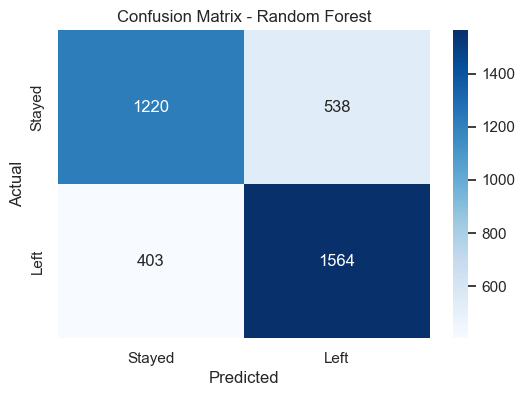

In [262]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [264]:
y_proba_rf = grid_rf.best_estimator_.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)

print("ROC-AUC Score:", roc_auc_rf)

ROC-AUC Score: 0.7209660478671689


c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


#### 5.2 Gradient Boosting

In [240]:
print("Model: Gradient Boosting")
print("Gradient Boosting Test Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb, target_names=le_target.classes_))

Model: Gradient Boosting
Gradient Boosting Test Accuracy: 0.7557046979865771
              precision    recall  f1-score   support

        Left       0.75      0.72      0.74      1758
      Stayed       0.76      0.79      0.77      1967

    accuracy                           0.76      3725
   macro avg       0.76      0.75      0.75      3725
weighted avg       0.76      0.76      0.76      3725



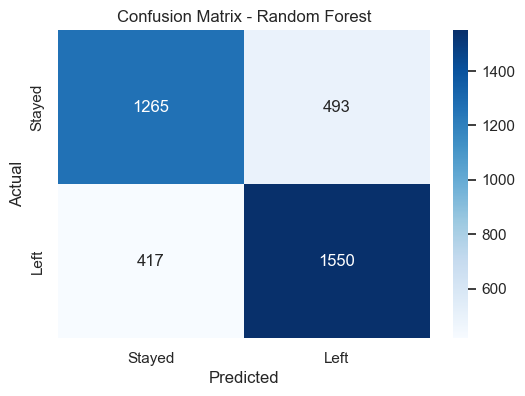

In [273]:
cm_gb = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(6,4))
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [269]:
le_gb = LabelEncoder()
y_test_gb_encoded = le_gb.fit_transform(y_test)

y_proba_gb = grid_gb.predict_proba(X_test)[:, 1]

# Hitung ROC-AUC Score
roc_auc_gb = roc_auc_score(y_test_gb_encoded, y_proba_gb)
print("ROC-AUC Score (Gradient Boosting):", roc_auc_gb)

ROC-AUC Score (Gradient Boosting): 0.8518747617833039


#### 5.3 XGBoost

In [243]:
print("Model: XGBoost")
print("XGBoost Test Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb, target_names=le_target.classes_))

Model: XGBoost
XGBoost Test Accuracy: 0.7570469798657719
              precision    recall  f1-score   support

        Left       0.75      0.72      0.74      1758
      Stayed       0.76      0.79      0.77      1967

    accuracy                           0.76      3725
   macro avg       0.76      0.76      0.76      3725
weighted avg       0.76      0.76      0.76      3725



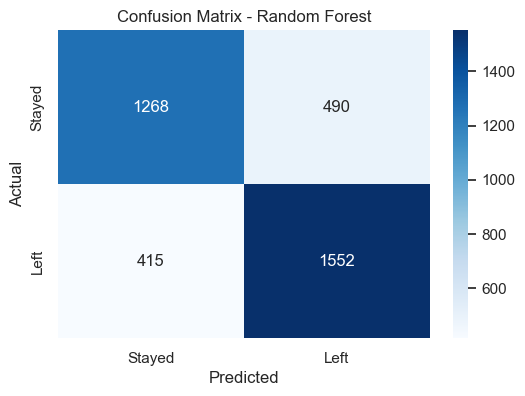

In [274]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(6,4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [270]:
y_proba_xgb = grid_xgb.predict_proba(X_test)[:, 1]
roc_auc_xgb = roc_auc_score(y_test_xgb, y_proba_xgb)
print("ROC-AUC Score (XGBoost):", roc_auc_xgb)

ROC-AUC Score (XGBoost): 0.8517637144858309


#### 5.4 AdaBoost

In [241]:
print("AdaBoost Test Accuracy:", accuracy_score(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada, target_names=le_target.classes_))

AdaBoost Test Accuracy: 0.7656375838926175
              precision    recall  f1-score   support

        Left       0.76      0.73      0.75      1758
      Stayed       0.77      0.79      0.78      1967

    accuracy                           0.77      3725
   macro avg       0.77      0.76      0.76      3725
weighted avg       0.77      0.77      0.77      3725



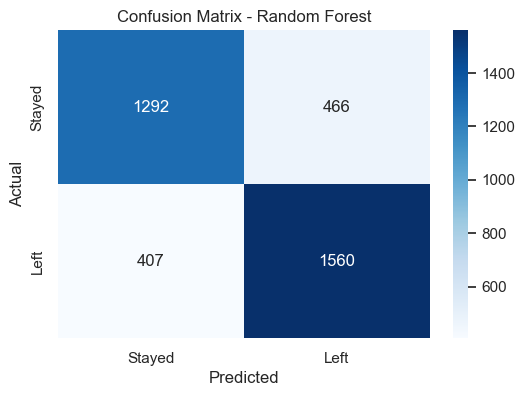

In [275]:
cm_ada = confusion_matrix(y_test, y_pred_ada)

plt.figure(figsize=(6,4))
sns.heatmap(cm_ada, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [272]:
le_ada = LabelEncoder()
y_test_ada_encoded = le_ada.fit_transform(y_test)

y_proba_ada = grid_ada.predict_proba(X_test)[:, 1]
roc_auc_ada = roc_auc_score(y_test_ada_encoded, y_proba_ada)
print("ROC-AUC Score (AdaBoost):", roc_auc_ada)

ROC-AUC Score (AdaBoost): 0.8556320066073142
